In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import  cross_validate, StratifiedShuffleSplit
from sklearn import tree
import graphviz

# Project files

In [7]:
sys.path.append('/content/drive/MyDrive/TFG/implementations/machine_learning_tfg/')
from src.utils.model_metrics_generator import ModelMetricsGenerator
from src.utils.cross_validation_utils import CrossValidationMetricsResultPrinter
from src.utils.my_metrics import accuracy_precision_recall_specifity_f2_score
metrics = accuracy_precision_recall_specifity_f2_score()

# Functions

In [8]:
def plot_metrics(metrics):
    history_df = pd.DataFrame(metrics)
    history_df.loc[:, ['test_accuracy', 'test_recall']].plot()
    plt.title(f'Rendimiento al aplicar cross validation.')
    plt.ylabel('Valor')
    plt.xlabel('iteraciones')
    plt.legend(title='', labels=['Precisión', 'Exhaustividad'])

# Load data

In [9]:
input_data = pd.read_excel('/content/drive/MyDrive/TFG/implementations/machine_learning_tfg/data/prepared/prepared_ICU_Prediction.xlsx')
#input_data = pd.read_excel('./../data/prepared/prepared_ICU_Prediction.xlsx')
ground_truth = input_data['ICU']
sample_data = input_data.drop('ICU', axis=1)
train_data, test_data, train_truth, test_truth = train_test_split(sample_data, ground_truth, test_size=0.2, shuffle=True, random_state=42)

# Decision Tree models

## Stratified cross validation

In [28]:
def evaluate_decision_tree(criterion='gini', class_weight=None, export=False):
  """ Evaluate a decision tree model

  """
  metrics = accuracy_precision_recall_specifity_f2_score()
  sskfold = StratifiedShuffleSplit(random_state=1)
  model = tree.DecisionTreeClassifier(criterion=criterion, class_weight=class_weight, random_state=0)
  
  #cross validation
  results = cross_validate(model, train_data, train_truth, cv=sskfold, scoring=metrics, n_jobs=-1)
  printer = CrossValidationMetricsResultPrinter()
  printer.print_metrics_report(results)
  plot_metrics(results)

  #fit and predict for getting performance measures
  metric_generator = ModelMetricsGenerator(model, test_truth)
  metric_generator.fit_and_predict_model(train_data, train_truth, test_data)
  metric_generator.print_results()

  if export:
    class_names = {0:'No UCI', 1:'UCI'}
    dot_data = tree.export_graphviz(gini_model,
                      feature_names=sample_data.columns,  
                      class_names=class_names,   
                      filled=True, rounded=True,  
                      special_characters=True)  
    graph = graphviz.Source(dot_data)
    graph.render("UCI_Decision_tree") 


Valores medios:
	Fit time: 0.1164
	Test time: 0.0085
	Accuracy: 86.64
	Precision: 81.17
	Recall: 75.71
	Specificity: 91.73
	F2 score: 76.7


0.1164
0.0085
86.64
81.17
75.71
91.73
76.7

 Indicadores rendimiento:
Fit time: 0.0781
Predict time: 0.0021
Accuracy: 90.18
Precision: 88.78
Recall: 84.47
Specificity: 93.6
F2-score: 85.29


0.0781
0.0021
90.18
88.78
84.47
93.6
85.29


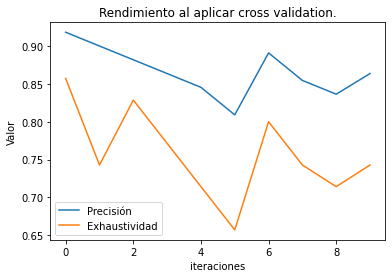

In [30]:
evaluate_decision_tree(export=True)


Valores medios:
	Fit time: 0.1364
	Test time: 0.0075
	Accuracy: 87.09
	Precision: 84.14
	Recall: 73.71
	Specificity: 93.33
	F2 score: 75.48


0.1364
0.0075
87.09
84.14
73.71
93.33
75.48

 Indicadores rendimiento:
Fit time: 0.0916
Predict time: 0.0016
Accuracy: 85.45
Precision: 80.0
Recall: 81.55
Specificity: 87.79
F2-score: 81.24


0.0916
0.0016
85.45
80.0
81.55
87.79
81.24


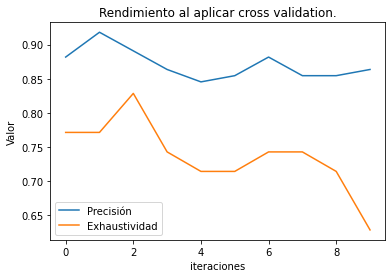

In [32]:
evaluate_decision_tree(criterion='entropy')


Valores medios:
	Fit time: 0.1116
	Test time: 0.0073
	Accuracy: 88.27
	Precision: 86.36
	Recall: 75.43
	Specificity: 94.27
	F2 score: 77.28


0.1116
0.0073
88.27
86.36
75.43
94.27
77.28

 Indicadores rendimiento:
Fit time: 0.0791
Predict time: 0.0015
Accuracy: 87.64
Precision: 85.57
Recall: 80.58
Specificity: 91.86
F2-score: 81.53


0.0791
0.0015
87.64
85.57
80.58
91.86
81.53


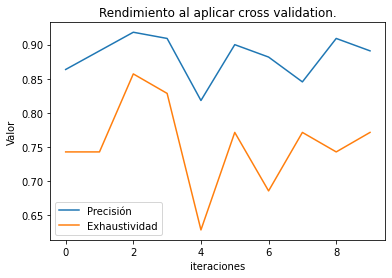

In [33]:
evaluate_decision_tree(class_weight={0:1, 1:5})


Valores medios:
	Fit time: 0.1295
	Test time: 0.0077
	Accuracy: 86.73
	Precision: 83.38
	Recall: 72.86
	Specificity: 93.2
	F2 score: 74.62


0.1295
0.0077
86.73
83.38
72.86
93.2
74.62

 Indicadores rendimiento:
Fit time: 0.0994
Predict time: 0.0017
Accuracy: 86.55
Precision: 85.11
Recall: 77.67
Specificity: 91.86
F2-score: 79.05


0.0994
0.0017
86.55
85.11
77.67
91.86
79.05


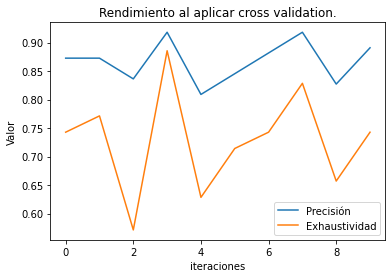

In [39]:
evaluate_decision_tree(class_weight={0:1, 1:10})


Valores medios:
	Fit time: 0.1181
	Test time: 0.0073
	Accuracy: 88.09
	Precision: 86.15
	Recall: 74.57
	Specificity: 94.4
	F2 score: 76.59


0.1181
0.0073
88.09
86.15
74.57
94.4
76.59

 Indicadores rendimiento:
Fit time: 0.0897
Predict time: 0.0016
Accuracy: 85.82
Precision: 82.0
Recall: 79.61
Specificity: 89.53
F2-score: 80.08


0.0897
0.0016
85.82
82.0
79.61
89.53
80.08


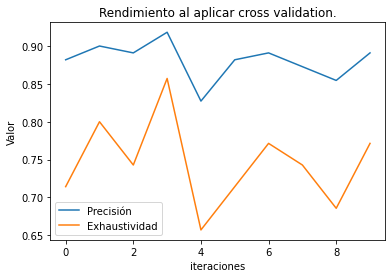

In [41]:
evaluate_decision_tree(class_weight={0:1, 1:7})